In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import pandas as pa
from data_tool import download_binance_minute_data

In [2]:
bar_data = download_binance_minute_data("BTCUSDT", "20250901", "20250902")

2025-09-01 00:00:00+08:00 2025-09-01 16:39:00+08:00
2025-09-01 16:39:00+08:00 2025-09-02 00:00:00+08:00


In [3]:
# 提取收盘价
close_prices = [bar.close_price for bar in bar_data]

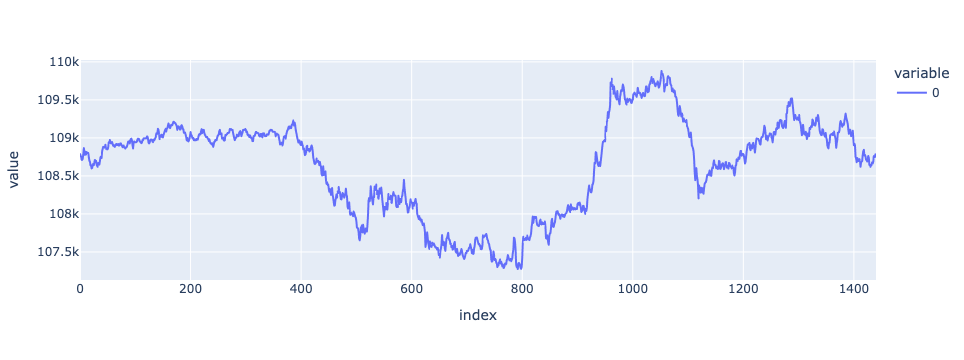

In [4]:
# 绘制曲线
fig = px.line(close_prices)
fig.show()

In [5]:
# 计算移动平均值: 是一种常用的时间序列数据平滑方法，用于消除短期波动，突出长期趋势。
def moving_average(data: list, window: int):
    # 最前面的window窗口数据无法计算
    ma = [0 for i in range(window - 1)]

    # 滚动求和，然后除以窗口得到均值
    for start_ix in range(len(data) - (window - 1)):
        end_ix = start_ix + window
        value = sum(data[start_ix:end_ix]) / window
        ma.append(value)

    # 返回结果
    return ma

In [10]:
# 计算移动平均值
def moving_average(data: list, window: int):
    # 最前面的window窗口数据无法计算
    ma = [0 for i in range(window - 1)]

    # 滚动求和，然后除以窗口得到均值
    for start_ix in range(len(data) - (window - 1)):
        end_ix = start_ix + window
        value = sum(data[start_ix:end_ix]) / window
        ma.append(value)

    # 返回结果
    return ma

In [6]:
# 计算不同窗口的移动平均
ma10 = moving_average(close_prices, 10)
ma20 = moving_average(close_prices, 20)

In [7]:
d = {
    "close": close_prices,
    "ma10": ma10,
    "ma20": ma20
}
df = pd.DataFrame(d)

In [8]:
df

,close,ma10,ma20
0,108787.20,0.000,0.0000
1,108767.22,0.000,0.0000
2,108751.60,0.000,0.0000
3,108711.38,0.000,0.0000
4,108711.00,0.000,0.0000
...,...,...,...
1436,108760.00,108672.804,108714.9465
1437,108750.91,108673.864,108711.1920
1438,108748.26,108684.221,108706.4145
1439,108784.33,108697.476,108707.1310


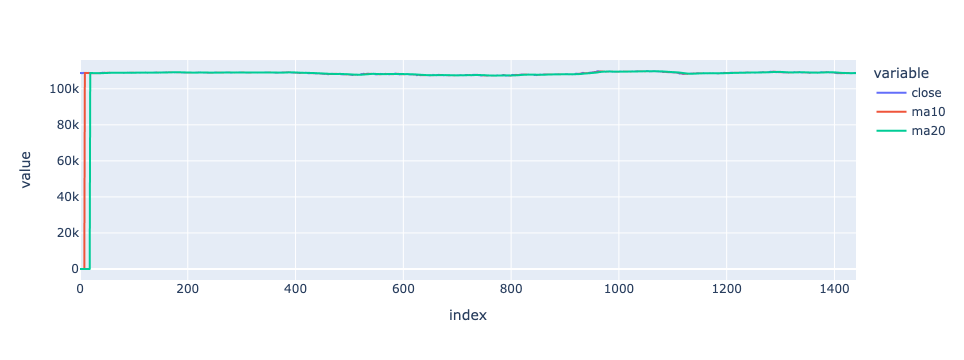

In [11]:
# 绘制折线图
fig = px.line(df)
fig.show()